In [1]:
import face_recognition
import cv2
import numpy as np

def compare_and_mark_faces(main_image_path, target_image_path):
    # Load images
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings in both images using the CNN model
    main_face_locations = face_recognition.face_locations(main_image, model="cnn")
    target_face_locations = face_recognition.face_locations(target_image, model="cnn")

    # Find face encodings in both images
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the original target image for drawing rectangles
    target_image_marked = np.copy(target_image)

    # Flag to check if the faces are exactly the same
    faces_are_same = False

    # Iterate through each face found in the target image
    for target_location, target_encoding in zip(target_face_locations, target_face_encodings):
        # Compare the face in the target image with faces in the main image
        matches = face_recognition.compare_faces(main_face_encodings, target_encoding)

        # If a match is found, mark the face in the original target image and set the flag to True
        if True in matches:
            top, right, bottom, left = target_location
            cv2.rectangle(target_image_marked, (left, top), (right, bottom), (0, 255, 0), 2)  # Green rectangle
            faces_are_same = True

    # Display the original target image with marked faces
    cv2.imshow('Original Target Image | Marked Faces', cv2.cvtColor(target_image_marked, cv2.COLOR_RGB2BGR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print result
    if faces_are_same:
        print("Faces are exactly the same.")
    else:
        print("Faces are different.")

# Example usage without resizing
main_image_path = 'C:\\Users\\Basuru Yasaruwan\\Contacts\\Desktop\\IPCV Practicals\\Practical 01\\IM\\main_image.jpg'
target_image_path = 'C:\\Users\\Basuru Yasaruwan\\Contacts\\Desktop\\IPCV Practicals\\Practical 01\\IM\\target_image.jpg'
compare_and_mark_faces(main_image_path, target_image_path)


Faces are exactly the same.


In [2]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt

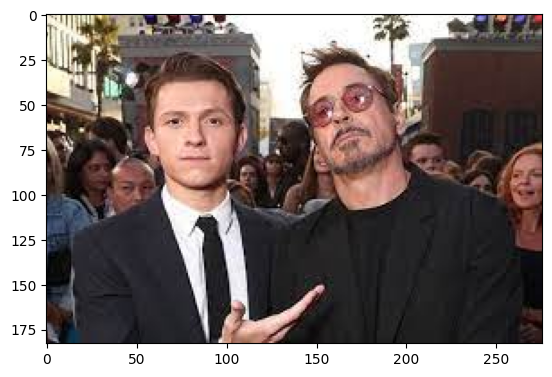

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 01\IM\duals.jpeg')
imgplot = plt.imshow(img)
plt.show()

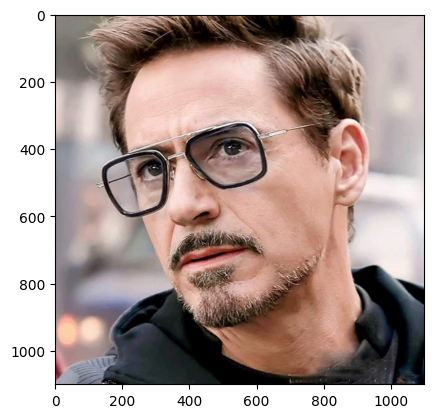

In [6]:
img2 = mpimg.imread(r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 01\IM\target_template_I.jpg')
imgplot = plt.imshow(img2)
plt.show()

In [9]:
def compare_and_mark_faces(main_image_path, target_image_path):
    
    # Load the main image and the target image
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings for the main and target images
    main_face_locations = face_recognition.face_locations(main_image)
    target_face_locations = face_recognition.face_locations(target_image)
    
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the main image for visualization
    main_image_marked = np.copy(main_image)

    # Iterate through faces in the main image
    for main_face_location, main_face_encoding in zip(main_face_locations, main_face_encodings):
        # Compare the face encoding with all face encodings in the target image
        results = face_recognition.compare_faces(target_face_encodings, main_face_encoding)

        # Check if there is at least one match
        if True in results:
            # Find the index of the first matching face in the target image
            target_index = results.index(True)

            # Draw a red bounding box around the matching face in the main image
            top, right, bottom, left = main_face_location
            cv2.rectangle(main_image_marked, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the marked main image
    #cv2.imshow('Face Matching with Marking', main_image_marked)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    plt.imshow(main_image_marked)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Specify the paths to the main image and the target image
main_image_path = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 01\IM\duals.jpeg'
#main_image_path = "duals.jpg"
target_image_path = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 01\IM\target_template_I.jpg'
#target_image_path = "target_template_II.jpg"

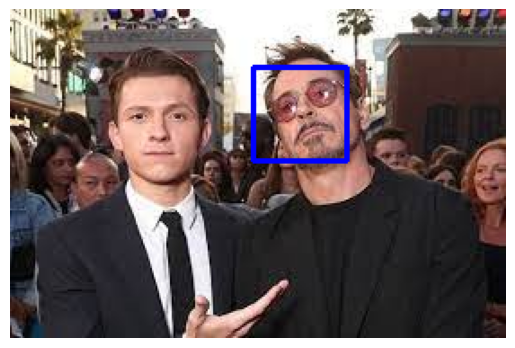

In [13]:
# Call the function for face comparison and marking
compare_and_mark_faces(main_image_path, target_image_path)